In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('digits.xlsx')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [4]:
X=df.drop('number',axis=1)
y=df['number']

In [5]:
X.iloc[0].values.reshape(8,8)


array([[ 0,  0,  5, 13,  9,  1,  0,  0],
       [ 0,  0, 13, 15, 10, 15,  5,  0],
       [ 0,  3, 15,  2,  0, 11,  8,  0],
       [ 0,  4, 12,  0,  0,  8,  8,  0],
       [ 0,  5,  8,  0,  0,  9,  8,  0],
       [ 0,  4, 11,  0,  1, 12,  7,  0],
       [ 0,  2, 14,  5, 10, 12,  0,  0],
       [ 0,  0,  6, 13, 10,  0,  0,  0]])

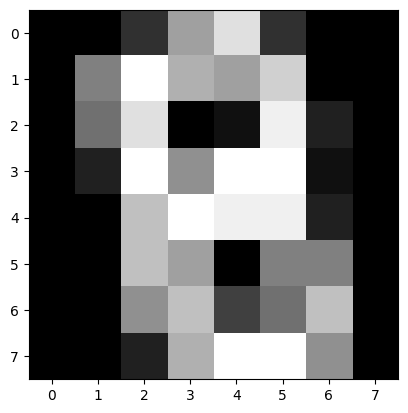

In [6]:
plt.imshow(X.iloc[500].values.reshape(8,8),cmap='gray')
plt.show()

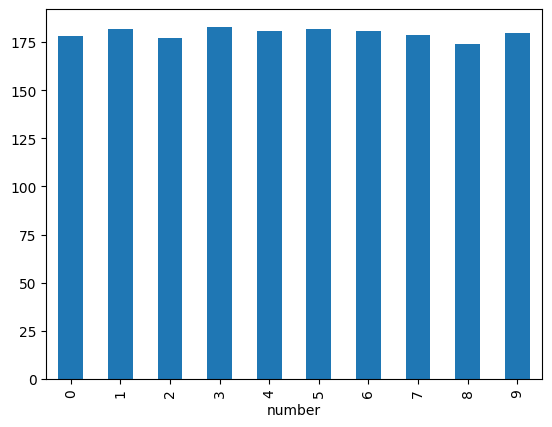

In [7]:
df['number'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne=TSNE(n_components=2)

In [11]:
X_tsne=tsne.fit_transform(X)

In [12]:
X_tsne= pd.DataFrame(X_tsne,columns=['col1','col2'])

In [13]:
X_tsne

,col1,col2
0,-39.097401,-29.917921
1,-15.605165,-2.822114
2,5.809827,-14.518415
3,28.088390,2.595299
4,-36.699062,2.807093
...,...,...
1792,36.445023,18.204138
1793,-31.154871,-24.950224
1794,1.820089,-4.942416
1795,36.096664,16.045277


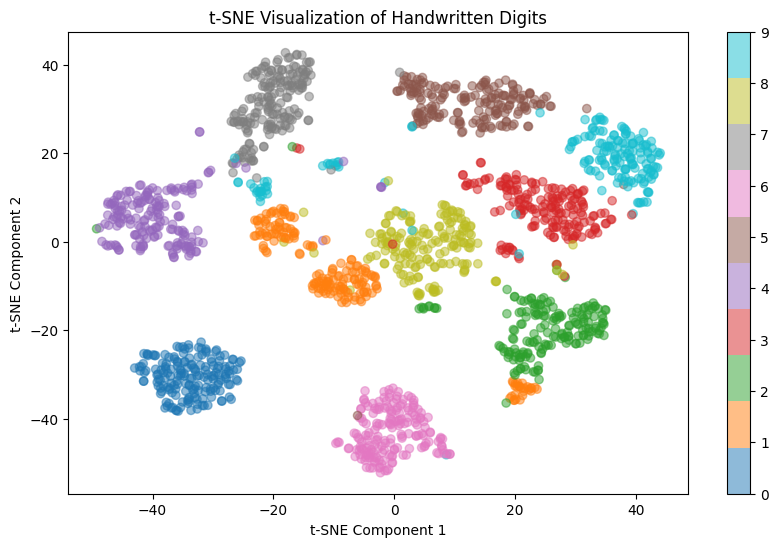

In [14]:
plt.figure(figsize=(10,6))
plt.title('t-SNE Visualization of Handwritten Digits')
scatter = plt.scatter(X_tsne['col1'], X_tsne['col2'], c=y, cmap='tab10',alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

from sklearn.metrics import classification_report
print (classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.99        36
           2       1.00      0.97      0.98        30
           3       0.85      0.97      0.91        36
           4       1.00      1.00      1.00        39
           5       0.97      0.89      0.93        37
           6       1.00      1.00      1.00        31
           7       1.00      0.97      0.99        39
           8       0.95      0.95      0.95        41
           9       0.94      0.92      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=64)
X_pca=pca.fit_transform(X)


In [19]:
var=pca.explained_variance_ratio_
exp=pd.DataFrame(range(1,65),columns=['principal component'])
exp['explained variance by pca']=var
exp['cummulative sum of variance']=np.cumsum(var)*100

In [20]:
exp[exp['cummulative sum of variance']>=95]

,principal component,explained variance by pca,cummulative sum of variance
39,40,4.231628e-03,95.077911
40,41,4.060531e-03,95.483964
41,42,3.970848e-03,95.881049
42,43,3.564933e-03,96.237542
43,44,3.407872e-03,96.578330
44,45,3.278353e-03,96.906165
45,46,3.110320e-03,97.217197
46,47,2.885753e-03,97.505772
47,48,2.764893e-03,97.782262
48,49,2.591749e-03,98.041436


In [21]:
pca=PCA(n_components=40)

X_pca=pca.fit_transform(X)
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=100)

lr=LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred_lr=lr.predict(X_test_pca)
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      0.91      0.94        34
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       0.94      1.00      0.97        34
           5       1.00      0.97      0.99        36
           6       0.97      1.00      0.99        39
           7       0.97      1.00      0.99        38
           8       0.85      0.79      0.82        29
           9       0.94      1.00      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.97      0.97       360

